# Feature Engineering


Faeture engineering deals with preparing data for it to be processed by a ML algorithm and train a model. It is an extreme important part of the Machine learning process as it ensures our model is precise, perfectly fitted, and efficient


In [1003]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import math

In [1004]:
ds = pd.read_csv("Data/Housing.csv")
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2,yes,yes,yes,no,yes,2.0,no,furnished


In [1005]:
ds.isnull().sum()

price               0
area                0
bedrooms            1
bathrooms           1
stories             0
mainroad            1
guestroom           1
basement            0
hotwaterheating     2
airconditioning     0
parking             1
prefarea            0
furnishingstatus    2
dtype: int64

## Imputation

Not really necessary as there are no missing values


#### a. Normal


In [1006]:
threshold=0.85

In [1007]:
ds = ds[ds.columns[ds.isnull().mean() < threshold]]
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2,yes,yes,yes,no,yes,2.0,no,furnished


In [1008]:
ds = ds.loc[ds.isnull().mean(axis=1) < threshold]
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2,yes,yes,yes,no,yes,2.0,no,furnished


##### b. Numerical imputation


In [1009]:
ds['bedrooms'].fillna(round(ds['bedrooms'].mean()),inplace=True)

In [1010]:
ds['bathrooms'].fillna(round(ds['bathrooms'].mean()),inplace=True)

In [1011]:
ds['parking'].fillna(round(ds['parking'].mean()),inplace=True)

In [1012]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2,yes,yes,yes,no,yes,2.0,no,furnished


##### c. Categorical Imputation


In [1013]:
ds['furnishingstatus'].fillna(ds['furnishingstatus'].value_counts().idxmax(), inplace=True)
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2,yes,yes,yes,no,yes,2.0,no,furnished


In [1014]:
ds['mainroad'].fillna('no', inplace=True)
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2,yes,yes,yes,no,yes,2.0,no,furnished


In [1015]:
ds['guestroom'].fillna('no', inplace=True)
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2,yes,yes,yes,no,yes,2.0,no,furnished


In [1016]:
ds['hotwaterheating'].fillna('no', inplace=True)
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2,yes,yes,yes,no,yes,2.0,no,furnished


In [1017]:
ds.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Outlier detection


a. With standard deviation


In [1018]:
factor = 2

In [1019]:
parking_upper_limit= ds['parking'].mean()+factor*ds['parking'].std();
parking_lower_limit= ds['parking'].mean()-factor*ds['parking'].std();

In [1020]:
print(f"upper - {parking_upper_limit}")
print(f"lower - {parking_lower_limit}")

upper - 2.4175712979606354
lower - -1.0315418861959298


In [1021]:
ds = ds[(ds['parking']>=parking_lower_limit) & (ds['parking'] <=parking_upper_limit)]
ds.count()

price               532
area                532
bedrooms            532
bathrooms           532
stories             532
mainroad            532
guestroom           532
basement            532
hotwaterheating     532
airconditioning     532
parking             532
prefarea            532
furnishingstatus    532
dtype: int64

b. With percentile


In [1022]:
cutoff = 0.03

In [1023]:
ds['bedrooms'].describe()

count    532.000000
mean       2.958647
std        0.740400
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: bedrooms, dtype: float64

In [1024]:
ds['bedrooms'].value_counts()

3.0    292
2.0    135
4.0     91
5.0     10
1.0      2
6.0      2
Name: bedrooms, dtype: int64

In [1025]:
upper_lim_bedrooms = ds['bedrooms'].quantile(1-cutoff)
lower_lim_bedrooms = ds['bedrooms'].quantile(cutoff)

In [1026]:
temp_ds = ds[(ds['bedrooms'] < upper_lim_bedrooms) & (ds['bedrooms'] > lower_lim_bedrooms)]

In [1027]:
temp_ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished
5,10850000,7500,3.0,3.0,1,yes,no,yes,no,yes,2.0,yes,semi-furnished
9,9800000,5750,3.0,2.0,4,yes,yes,no,no,yes,1.0,yes,unfurnished
10,9800000,13200,3.0,1.0,2,yes,no,yes,no,yes,2.0,yes,semi-furnished
14,9240000,7800,3.0,2.0,2,yes,no,no,no,no,0.0,yes,semi-furnished


In [1028]:
temp_ds['bedrooms'].describe()

count    292.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: bedrooms, dtype: float64

In [1029]:
temp_ds['bedrooms'].value_counts()

3.0    292
Name: bedrooms, dtype: int64

In [1030]:
ds.guestroom.replace(('yes','no'),(1,0),inplace=True)  # One hot encoding, more ahead

In [1031]:
ds['bedrooms'] = ds['bedrooms'] + ds['guestroom']
del ds['guestroom']
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,yes,2.0,yes,furnished
2,12250000,9960,3.0,2.0,2,yes,yes,no,no,2.0,yes,semi-furnished
4,11410000,7420,5.0,1.0,2,yes,yes,no,yes,2.0,no,furnished
5,10850000,7500,3.0,3.0,1,yes,yes,no,yes,2.0,yes,semi-furnished
6,10150000,8580,4.0,3.0,4,yes,no,no,yes,2.0,yes,semi-furnished


## Binning


In [1032]:
ds['parking'].value_counts()

0.0    299
1.0    125
2.0    108
Name: parking, dtype: int64

In [1033]:
conditions = [ds['parking'] == 0,ds['parking'] > 0]
choices = ['no','yes']
ds['parking'] = np.select(conditions,choices,default=None)
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,yes,no,no,yes,yes,yes,furnished
2,12250000,9960,3.0,2.0,2,yes,yes,no,no,yes,yes,semi-furnished
4,11410000,7420,5.0,1.0,2,yes,yes,no,yes,yes,no,furnished
5,10850000,7500,3.0,3.0,1,yes,yes,no,yes,yes,yes,semi-furnished
6,10150000,8580,4.0,3.0,4,yes,no,no,yes,yes,yes,semi-furnished


In [1034]:
ds['parking'].value_counts()

no     299
yes    233
Name: parking, dtype: int64

## One hot encoding


In [1035]:
ds.mainroad.replace(('yes','no'),(1,0),inplace=True)


In [1036]:
ds.parking.replace(('yes','no'),(1,0),inplace=True)

In [1037]:
ds.basement.replace(('yes','no'),(1,0),inplace=True)


In [1038]:
ds.hotwaterheating.replace(('yes','no'),(1,0),inplace=True)


In [1039]:
ds.airconditioning.replace(('yes','no'),(1,0),inplace=True)


In [1040]:
ds.prefarea.replace(('yes','no'),(1,0),inplace=True)


In [1041]:
ds.furnishingstatus.replace(('furnished','semi-furnished','unfurnished'),(2,1,0),inplace=True)


In [1042]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3,1,0,0,1,1,1,2
2,12250000,9960,3.0,2.0,2,1,1,0,0,1,1,1
4,11410000,7420,5.0,1.0,2,1,1,0,1,1,0,2
5,10850000,7500,3.0,3.0,1,1,1,0,1,1,1,1
6,10150000,8580,4.0,3.0,4,1,0,0,1,1,1,1


In [1043]:
ds['area'].describe()

count      532.000000
mean      5102.218045
std       2161.780356
min       1650.000000
25%       3535.000000
50%       4500.000000
75%       6322.000000
max      16200.000000
Name: area, dtype: float64

## Log transformation


In [1044]:
ds['area_log'] = np.log(ds['area'])
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_log
0,13300000,7420,4.0,2.0,3,1,0,0,1,1,1,2,8.911934
2,12250000,9960,3.0,2.0,2,1,1,0,0,1,1,1,9.206332
4,11410000,7420,5.0,1.0,2,1,1,0,1,1,0,2,8.911934
5,10850000,7500,3.0,3.0,1,1,1,0,1,1,1,1,8.922658
6,10150000,8580,4.0,3.0,4,1,0,0,1,1,1,1,9.057189


## Normalization

In [1045]:
ds['bedrooms'] = ds['bedrooms'] / ds['bedrooms'].max()

## Standardization

In [1046]:
ds['stories'] = ds['stories'] = ds['stories'].mean()

## Conclusion


In [1047]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_log
0,13300000,7420,0.666667,2.0,1.796992,1,0,0,1,1,1,2,8.911934
2,12250000,9960,0.500000,2.0,1.796992,1,1,0,0,1,1,1,9.206332
4,11410000,7420,0.833333,1.0,1.796992,1,1,0,1,1,0,2,8.911934
5,10850000,7500,0.500000,3.0,1.796992,1,1,0,1,1,1,1,8.922658
6,10150000,8580,0.666667,3.0,1.796992,1,0,0,1,1,1,1,9.057189


In [1048]:
ds.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_log
count,5.320000e+02,532.000000,532.000000,532.000000,5.320000e+02,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,4.739683e+06,5102.218045,0.523183,1.280075,1.796992e+00,0.853383,0.351504,0.046992,0.313910,0.437970,0.234962,0.919173,8.457258
std,1.827557e+06,2161.780356,0.143876,0.489569,1.555775e-15,0.354056,0.477889,0.211822,0.464517,0.496604,0.424374,0.758535,0.396880
min,1.750000e+06,1650.000000,0.166667,1.000000,1.796992e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.408531
25%,3.430000e+06,3535.000000,0.500000,1.000000,1.796992e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.170466
50%,4.340000e+06,4500.000000,0.500000,1.000000,1.796992e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.411833
75%,5.740000e+06,6322.000000,0.666667,2.000000,1.796992e+00,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.250000,8.751791
max,1.330000e+07,16200.000000,1.000000,3.000000,1.796992e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.692767


In [1049]:
y = ds['price'].to_numpy()
y

array([13300000, 12250000, 11410000, 10850000, 10150000, 10150000,
        9870000,  9800000,  9800000,  9681000,  9310000,  9240000,
        9240000,  9100000,  9100000,  8960000,  8890000,  8855000,
        8750000,  8680000,  8645000,  8645000,  8575000,  8540000,
        8463000,  8400000,  8400000,  8400000,  8400000,  8400000,
        8295000,  8190000,  8120000,  8080940,  8043000,  7980000,
        7962500,  7910000,  7875000,  7840000,  7700000,  7700000,
        7560000,  7560000,  7525000,  7455000,  7420000,  7420000,
        7420000,  7350000,  7350000,  7350000,  7350000,  7343000,
        7245000,  7210000,  7210000,  7140000,  7070000,  7070000,
        7035000,  7000000,  6930000,  6930000,  6895000,  6860000,
        6790000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6650000,  6650000,  6650000,  6650000,  6650000,  6629000,
        6615000,  6615000,  6580000,  6510000,  6510000,  6510000,
        6475000,  6475000,  6440000,  6440000,  6419000,  6405

In [1050]:
X = ds[ds.columns.difference(['price','area'])].to_numpy()
X

array([[1.        , 8.91193434, 0.        , ..., 1.        , 1.        ,
        1.79699248],
       [0.        , 9.20633235, 1.        , ..., 1.        , 1.        ,
        1.79699248],
       [1.        , 8.91193434, 1.        , ..., 1.        , 0.        ,
        1.79699248],
       ...,
       [0.        , 8.1942293 , 0.        , ..., 0.        , 0.        ,
        1.79699248],
       [0.        , 7.97590836, 0.        , ..., 0.        , 0.        ,
        1.79699248],
       [0.        , 8.25582843, 0.        , ..., 0.        , 0.        ,
        1.79699248]])

In [1051]:
from sklearn.model_selection import train_test_split

In [1052]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1053]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(425, 11)
(107, 11)
(425,)
(107,)


In [1054]:
from sklearn import linear_model

In [1055]:
model_ols =  linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
model_ols.fit(X,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1056]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [ 934841.7521543  1391609.58165126  182773.64750379 1060572.30340665
 1844557.48604324  210711.95141083  891157.98983107  441238.61638271
  454035.77035802  673867.44875148 1727538.3364671 ]
intercept=  -13783538.637241758


In [1057]:
from sklearn.metrics import r2_score,mean_squared_error

In [1058]:
pred = model_ols.predict(X)
pred

array([7999025.06560563, 7138505.85955252, 6754785.20862516,
       8739156.38760057, 9051023.46743855, 7969468.29299055,
       7550675.94980473, 7222769.66164403, 7404707.8941011 ,
       8325928.96778105, 7614759.90634696, 6235796.02571146,
       6161512.8344011 , 5006200.12346281, 7904830.48348289,
       7206833.16835385, 6659797.41162167, 7279436.15609531,
       4691543.84202761, 7035897.79944601, 6560765.44825307,
       6830417.18639787, 7255101.92319472, 8313545.53467363,
       7221445.85741723, 5060785.96941039, 7446260.9879138 ,
       7554395.7618438 , 6606584.58953452, 5665359.54350511,
       7415893.56256305, 6907324.31886308, 6948946.50780756,
       6936643.79832259, 7659494.74852206, 7593801.61239938,
       5547556.27670248, 6818840.53151996, 6186211.18382305,
       7023045.48450807, 6407802.05469415, 5883998.77936566,
       7029552.4829308 , 6057378.51348808, 6722126.23525692,
       5085027.22392173, 7520796.91441439, 6339079.0860296 ,
       5313538.22125664,

In [1059]:
y

array([13300000, 12250000, 11410000, 10850000, 10150000, 10150000,
        9870000,  9800000,  9800000,  9681000,  9310000,  9240000,
        9240000,  9100000,  9100000,  8960000,  8890000,  8855000,
        8750000,  8680000,  8645000,  8645000,  8575000,  8540000,
        8463000,  8400000,  8400000,  8400000,  8400000,  8400000,
        8295000,  8190000,  8120000,  8080940,  8043000,  7980000,
        7962500,  7910000,  7875000,  7840000,  7700000,  7700000,
        7560000,  7560000,  7525000,  7455000,  7420000,  7420000,
        7420000,  7350000,  7350000,  7350000,  7350000,  7343000,
        7245000,  7210000,  7210000,  7140000,  7070000,  7070000,
        7035000,  7000000,  6930000,  6930000,  6895000,  6860000,
        6790000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6650000,  6650000,  6650000,  6650000,  6650000,  6629000,
        6615000,  6615000,  6580000,  6510000,  6510000,  6510000,
        6475000,  6475000,  6440000,  6440000,  6419000,  6405

In [1060]:
y.mean()

4739683.157894737

In [1061]:
r2_score(y,pred)

0.6491866265239757

In [1062]:
math.sqrt(mean_squared_error(y,pred))

1081434.7961049557

In [1063]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

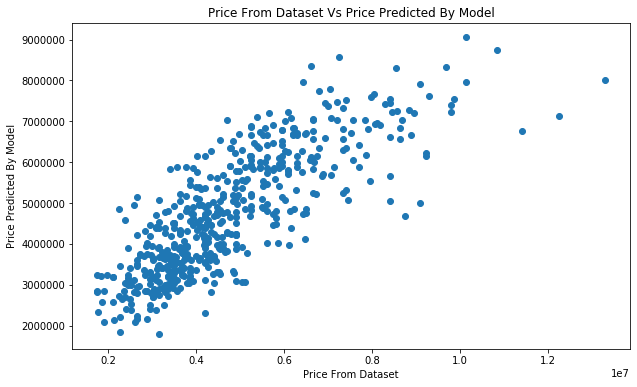

In [1064]:
plt.scatter(y, model_ols.predict(X))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")

In [1065]:
eg = ds.loc[220,ds.columns.difference(['price','area'])]
eg.values

array([0.        , 8.13739583, 0.        , 2.        , 0.66666667,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.79699248])

In [1066]:
model_ols.predict([eg.values])

array([4647712.93647774])